In [1]:
import pandas as pd

In [3]:
# Load the data
players = pd.read_csv("player_stats.csv")
teams = pd.read_csv("team_data.csv")
world_cups = pd.read_csv("world_cups.csv")

In [5]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        680 non-null    object 
 1   position      680 non-null    object 
 2   team          680 non-null    object 
 3   age           680 non-null    object 
 4   club          679 non-null    object 
 5   birth_year    680 non-null    int64  
 6   games         680 non-null    int64  
 7   games_starts  680 non-null    int64  
 8   minutes       680 non-null    int64  
 9   minutes_90s   680 non-null    float64
 10  goals         680 non-null    int64  
 11  assists       680 non-null    int64  
 12  goals_pens    680 non-null    int64  
 13  pens_made     680 non-null    int64  
 14  pens_att      680 non-null    int64  
 15  cards_yellow  680 non-null    int64  
 16  cards_red     680 non-null    int64  
dtypes: float64(1), int64(11), object(5)
memory usage: 90.4+ KB


In [28]:
#Player Performance Evaluation

# Calculate goals per match
players['Goals_per_match'] = players['goals'] / players['games']

# Display top scorers based on goals per match
top_scorers = players.sort_values(by='Goals_per_match', ascending=False).head(10)
top_scorers[['player', 'Goals_per_match']]


,player,Goals_per_match
377,Kylian Mbappé,1.142857
388,Lionel Messi,1.000000
225,Giorgian De Arrascaeta,1.000000
509,Paik Seung-ho,1.000000
335,Kai Havertz,1.000000
185,Enner Valencia,1.000000
327,Juan Pablo Vargas,1.000000
540,Richarlison,0.750000
229,Gonçalo Ramos,0.750000
109,Bukayo Saka,0.750000


In [30]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   team                        32 non-null     object 
 1   players_used                32 non-null     int64  
 2   avg_age                     32 non-null     float64
 3   possession                  32 non-null     float64
 4   games                       32 non-null     int64  
 5   games_starts                32 non-null     int64  
 6   minutes                     32 non-null     int64  
 7   goals                       32 non-null     int64  
 8   assists                     32 non-null     int64  
 9   goals_pens                  32 non-null     int64  
 10  pens_made                   32 non-null     int64  
 11  pens_att                    32 non-null     int64  
 12  cards_yellow                32 non-null     int64  
 13  cards_red                   32 non-nu

In [44]:
#Predicting Match Outcomes

# Since matches have no result we use a proxy for Match_Result based on goals
# This is a simplified approach to adjust it as needed for our data.
teams['Match_Result'] = (teams['goals'] > teams['goals'].mean()).astype(int)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Calculate Pass Accuracy
teams['Pass_Accuracy'] = (teams['passes_completed'] / teams['passes']) * 100

# Prepare data for training
features = teams[['goals', 'possession', 'Pass_Accuracy']]
labels = teams['Match_Result']

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Test the model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 1.0


C:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


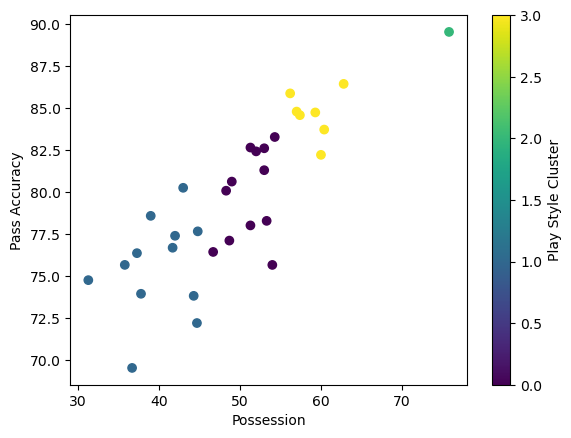

In [52]:
#Improved Tactical Understanding

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate Pass Accuracy
teams['Pass_Accuracy'] = (teams['passes_completed'] / teams['passes']) * 100

# Apply clustering (excluding Goals_Conceded if not available)
kmeans = KMeans(n_clusters=4, random_state=0).fit(teams[['possession', 'Pass_Accuracy']])
teams['Play_Style'] = kmeans.labels_

# Visualize clusters
plt.scatter(teams['possession'], teams['Pass_Accuracy'], c=teams['Play_Style'], cmap='viridis')
plt.xlabel('Possession')
plt.ylabel('Pass Accuracy')
plt.colorbar(label='Play Style Cluster')
plt.show()


In [74]:
#Team Management and Player Selection

# Check players with position as 'Forward'
forwards = players[players['position'] == 'FW']
print("Total forwards:", len(forwards))

# Check players with Goals per Match greater than 0.3
high_scorers = players[players['Goals_per_match'] > 0.3]
print("Total high scorers:", len(high_scorers))


# Try a lower threshold for Goals per Match
selected_players = players[(players['position'] == 'FW') & (players['Goals_per_match'] > 0.1)]
selected_players = selected_players.sort_values(by='Goals_per_match', ascending=False).head(3)
print(selected_players[['player', 'Goals_per_match']])



Total forwards: 185
Total high scorers: 65
            player  Goals_per_match
377  Kylian Mbappé         1.142857
388   Lionel Messi         1.000000
335    Kai Havertz         1.000000


In [78]:
world_cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            22 non-null     int64 
 1   Country         22 non-null     object
 2   Winner          22 non-null     object
 3   Runners-Up      22 non-null     object
 4   Third           22 non-null     object
 5   Fourth          22 non-null     object
 6   GoalsScored     22 non-null     int64 
 7   QualifiedTeams  22 non-null     int64 
 8   MatchesPlayed   22 non-null     int64 
 9    Attendance     22 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.8+ KB


Winner
Brazil        5
Italy         4
Germany FR    3
Argentina     3
Uruguay       2
France        2
England       1
Spain         1
Germany       1
Name: count, dtype: int64


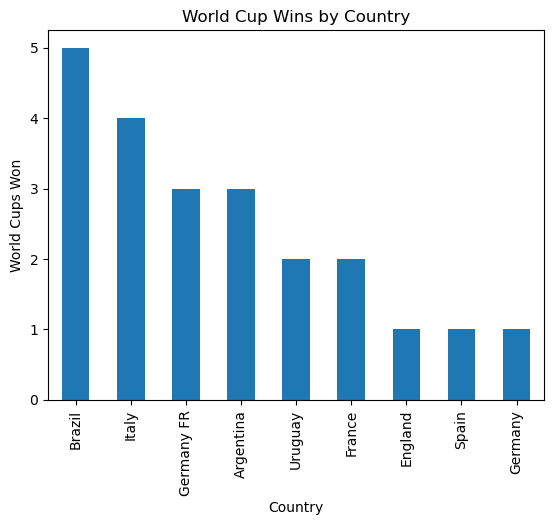

In [76]:
#World Cup Wins Analysis

# Count the number of World Cups each country has won
world_cup_wins = world_cups['Winner'].value_counts()
print(world_cup_wins)

# Plot world cup wins
world_cup_wins.plot(kind='bar', title="World Cup Wins by Country")
plt.xlabel("Country")
plt.ylabel("World Cups Won")
plt.show()
